In [ ]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
df <- read.csv("/content/50_Startups.csv")
print(df)
print(class(df))

   R.D.Spend Administration Marketing.Spend      State    Profit
1  165349.20      136897.80       471784.10   New York 192261.83
2  162597.70      151377.59       443898.53 California 191792.06
3  153441.51      101145.55       407934.54    Florida 191050.39
4  144372.41      118671.85       383199.62   New York 182901.99
5  142107.34       91391.77       366168.42    Florida 166187.94
6  131876.90       99814.71       362861.36   New York 156991.12
7  134615.46      147198.87       127716.82 California 156122.51
8  130298.13      145530.06       323876.68    Florida 155752.60
9  120542.52      148718.95       311613.29   New York 152211.77
10 123334.88      108679.17       304981.62 California 149759.96
11 101913.08      110594.11       229160.95    Florida 146121.95
12 100671.96       91790.61       249744.55 California 144259.40
13  93863.75      127320.38       249839.44    Florida 141585.52
14  91992.39      135495.07       252664.93 California 134307.35
15 119943.24      156547.

In [ ]:
%%R
print(ncol(df))
print(nrow(df))
df = na.omit(df)

[1] 5
[1] 50


In [ ]:
%%R
#install.packages("fastDummies") 
library(fastDummies) 
data = dummy_cols(df, select_columns = "State")

In [ ]:
%%R
data = within(data, rm("State"))

print(data)

   R.D.Spend Administration Marketing.Spend    Profit State_California
1  165349.20      136897.80       471784.10 192261.83                0
2  162597.70      151377.59       443898.53 191792.06                1
3  153441.51      101145.55       407934.54 191050.39                0
4  144372.41      118671.85       383199.62 182901.99                0
5  142107.34       91391.77       366168.42 166187.94                0
6  131876.90       99814.71       362861.36 156991.12                0
7  134615.46      147198.87       127716.82 156122.51                1
8  130298.13      145530.06       323876.68 155752.60                0
9  120542.52      148718.95       311613.29 152211.77                0
10 123334.88      108679.17       304981.62 149759.96                1
11 101913.08      110594.11       229160.95 146121.95                0
12 100671.96       91790.61       249744.55 144259.40                1
13  93863.75      127320.38       249839.44 141585.52                0
14  91

In [ ]:
%%R
# install.packages("caTools")
library(caTools)
set.seed(32)
split = sample.split(data$Profit, SplitRatio= 0.8)
training_set = subset(data,split == TRUE)
testing_set = subset(data,split == FALSE)

In [ ]:
%%R
# training_target = training_set$Purchased
# testing_target = test_set$Purchased

# training_set = within(training_set, rm("Purchased"))
# testing_set = within(test_set, rm("Purchased"))

NULL


In [ ]:
%%R
#scaling
training_set[,1:4]=scale(training_set[,1:4])
testing_set[,1:4]=scale(testing_set[,1:4])
print(training_set)
print(testing_set)

       R.D.Spend Administration Marketing.Spend      Profit State_California
1   1.9103626505     0.62003188      2.13293855  1.88699906                0
2   1.8519452348     1.12843892      1.89283116  1.87565987                1
3   1.6575491026    -0.63528301      1.58316493  1.85775764                0
4   1.4650019884    -0.01990844      1.37018607  1.66107367                0
5   1.4169120244    -0.97775279      1.22353973  1.25763428                0
7   1.2578510509     0.98171782     -0.82963651  1.01467755                1
9   0.9590668291     1.03509010      0.75379536  0.92028112                0
10  1.0183517482    -0.37076636      0.69669368  0.86109997                1
11  0.5635430272    -0.30352996      0.04384338  0.77328663                0
12  0.5371926645    -0.96374892      0.22107749  0.72832888                1
13  0.3926467681     0.28375436      0.22189454  0.66378746                0
14  0.3529157068     0.57077993      0.24622329  0.48810889                1

In [ ]:
%%R
regressor = lm(formula = Profit ~ . ,
               data= training_set)

In [ ]:
%%R
summary(regressor)


Call:
lm(formula = Profit ~ ., data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79792 -0.12989  0.01449  0.18084  0.43173 

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0022769  0.0677596   0.034    0.973    
R.D.Spend         0.9000759  0.0640397  14.055    1e-15 ***
Administration   -0.0205189  0.0435102  -0.472    0.640    
Marketing.Spend   0.1024036  0.0617604   1.658    0.107    
State_California -0.0073478  0.0993664  -0.074    0.941    
State_Florida    -0.0002073  0.0965790  -0.002    0.998    
`State_New York`         NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2515 on 34 degrees of freedom
Multiple R-squared:  0.9449,	Adjusted R-squared:  0.9368 
F-statistic: 116.5 on 5 and 34 DF,  p-value: < 2.2e-16



In [ ]:
%%R
y_pred = predict(regressor,newdata=testing_set)
print(y_pred)
print(confint(regressor))

          6           8          20          22          26          33 
 1.55147454  1.45243297  0.27540552  0.32629355 -0.08063127 -0.16695377 
         34          40          45          48 
-0.18235214 -0.56226748 -1.07576259 -1.55202392 
                       2.5 %     97.5 %
(Intercept)      -0.13542711 0.13998090
R.D.Spend         0.76993162 1.03022025
Administration   -0.10894224 0.06790443
Marketing.Spend  -0.02310863 0.22791589
State_California -0.20928454 0.19458898
State_Florida    -0.19647945 0.19606482
`State_New York`          NA         NA


# Polynomial Regression


In [ ]:
%%R
df <- read.csv("/content/Position_Salaries.csv")
print(df)
print(class(df))

            Position Level  Salary
1   Business Analyst     1   45000
2  Junior Consultant     2   50000
3  Senior Consultant     3   60000
4            Manager     4   80000
5    Country Manager     5  110000
6     Region Manager     6  150000
7            Partner     7  200000
8     Senior Partner     8  300000
9            C-level     9  500000
10               CEO    10 1000000
[1] "data.frame"


In [ ]:
%%R
x_train = df[2:3]
print(x_train)

   Level  Salary
1      1   45000
2      2   50000
3      3   60000
4      4   80000
5      5  110000
6      6  150000
7      7  200000
8      8  300000
9      9  500000
10    10 1000000


In [ ]:
%%R
print(ncol(df))
print(nrow(df))
df = na.omit(df)

# Fitting Polynomial Regression to the dataset
df$Level2 = df$Level^2
df$Level3 = df$Level^3
df$Level4 = df$Level^4
poly_reg = lm(formula = Salary ~ .,
              data = df)

[1] 3
[1] 10


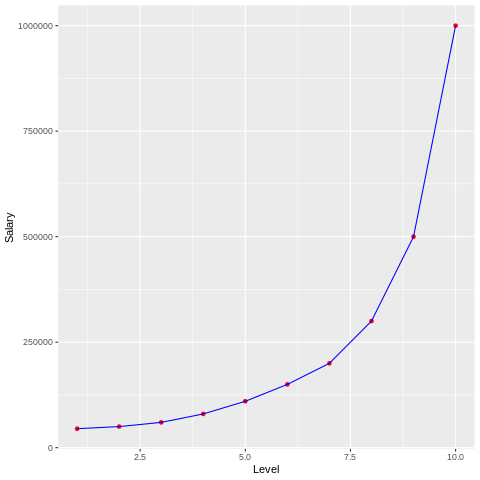

In [ ]:
%%R
library(ggplot2)
ggplot() +
  geom_point(aes(x = df$Level, y = df$Salary),
             colour = 'red') +
  geom_line(aes(x = df$Level, y = predict(poly_reg, newdata = df)),
            colour = 'blue') +
  xlab('Level') +
  ylab('Salary')
